# Unidad 2

## Situación 1:
Sea p la proporción de estudiantes de una universidad que aprueban las políticas gubernamentales
sobre becas estudiantiles. El periódico estudiantil toma una muestra aleatoria de n = 30 estudiantes
de la universidad y registra si los estudiantes aprueban las políticas gubernamentales sobre
asignación de becas.

(a) ¿Cuál es la distribución de y, el número de respuestas “si”?

(b) Suponga que, de los 30 estudiantes, 8 contestaron que sí. ¿Cuál es el estimador frecuentista de p?

(c) Encuentre la distribución final de p, f(p|y), si se usa una inicial uniforme.

(d) Cuál sería el estimador Bayesiano de p?

### Solución

(a) Distribución de número de respuesta si.

No se conoce, se podría tomar una distribución a priori no informativa como una uniforme modelada 
como $Beta(\theta, \alpha=1, \beta=1)$.

(b) Suponga que, de los 30 estudiantes, 8 contestaron que sí. ¿Cuál es el estimador frecuentista de p?

$$p=\frac{8}{30}=\frac{2}{15}$$

(c) Encuentre la distribución final de p, f(p|y), si se usa una inicial uniforme.

$$p(\theta) = Beta(\theta, \alpha=1, \beta=1) \propto \theta^{\alpha-1} (1-\theta)^{\beta-1}$$

Verosimilitud
$$p(y|\theta)=Binomial(y = 8, n=30, p=\theta) \propto \theta^8 (1-\theta)^{30-8}$$

Distribución final
$$p(\theta|y)=p(y|\theta)p(\theta)$$

$$p(\theta|y)\propto \theta^{1-1} (1-\theta)^{1-1} \theta^8 (1-\theta)^{30-8}$$

$$p(\theta|y)\propto \theta^{8+1-1} (1-\theta)^{30+1-8-1} =\theta^{9-1} (1-\theta)^{23-1}$$

$$p(\theta|y)\propto Beta(\theta, \alpha=9, \beta=23)$$

(d) Cuál sería el estimador Bayesiano de p?

$$Modo = \frac{\alpha-1}{\alpha+\beta-2}=\frac{8}{30}=0.267$$
$$Media = \frac{\alpha}{\alpha+\beta}=\frac{9}{32}=0.281$$

Cálculo numérico de la mediana
$$P(p <= p_{med}|D)= 0.5$$
p = 0.277

In [3]:
qbeta(0.5, 9, 23)

[1] 0.2766453

## Situación 2:

En el estudio de la calidad del agua en los arroyos de Nueva Zelanda documentados en McBride et
al. (2002) un alto nivel de Campylobacter se define como un nivel mayor que 100 por cada 100 ml
de agua corriente; n = 116 muestras fueron tomadas de arroyos que tiene un alto impacto ambiental
para las aves. De estas 11 resultaron tener alto nivel de Campylobacter. Sea p la verdadera
probabilidad de que una muestra de agua de este tipo de arroyos tenga un alto nivel de
Campylobacter.

(a) Obtenga el estimador frecuentista de p.

(b) Utilice un Beta (1, 10) como inicial y obtenga la distribución posterior de p.

(c) Encuentre la media y la varianza posterior. ¿Cuál es el estimador Bayesiano para p?

(d) Encuentre un intervalo de credibilidad del 95% para p.

### Solución

(a) Obtenga el estimador frecuentista de p.

$$p = \frac{11}{116}=0.0948$$

(b) Utilice un Beta (1, 10) como inicial y obtenga la distribución posterior de p.

Distribución a priori
$$p(\theta)=Beta(\theta, \alpha=1, \beta=10)$$

Verosimilitud

$$p(y|\theta)=Binomial(y=11, n=116, p=\theta)$$

Distribución posterior
$$p(\theta|y)\propto Beta(\theta, \alpha=12, \beta=115)$$

(c) Encuentre la media y la varianza posterior. ¿Cuál es el estimador Bayesiano para p?

Media
$$E[\theta|y]=\frac{\alpha}{\alpha+\beta}=\frac{12}{12+115}=0.0945$$

Mediana

Se calcula numéricamente
$$P(p <= p_{med}|D)= 0.5$$
$$p=0.0924$$ 

In [1]:
qbeta(0.5, 12, 115)

[1] 0.09236085

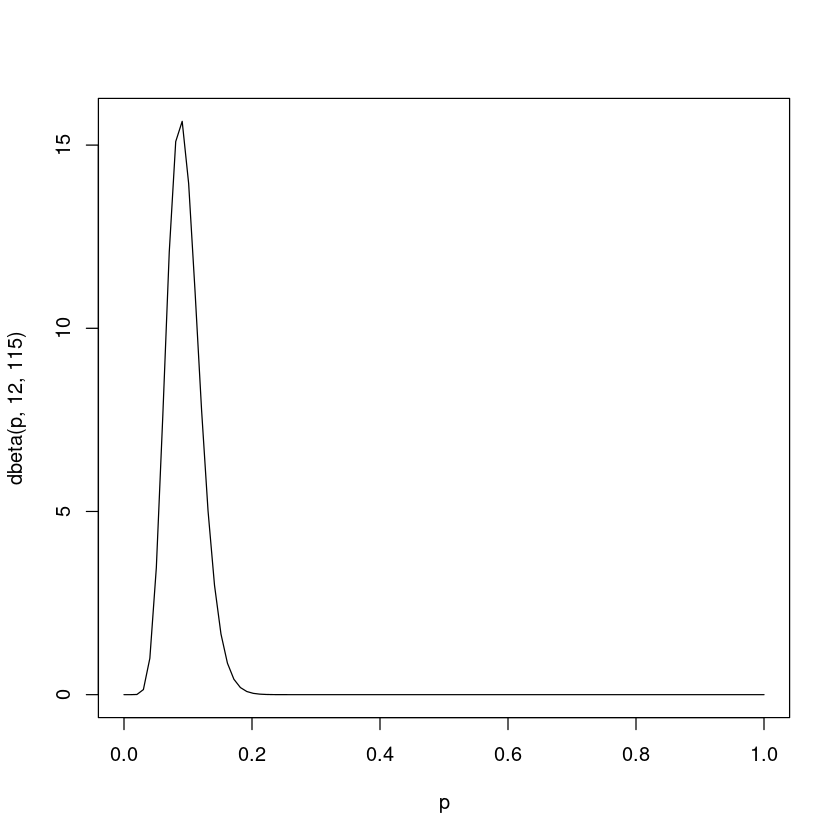

In [5]:
p = seq(0, 1, length=100)
plot(p, dbeta(p, 12, 115), type='l')

(d) Encuentre un intervalo de credibilidad del 95% para p.

In [8]:
cat(round(qbeta(.025, 12, 115), 3), round(qbeta(0.975, 12, 115), 3))

0.05 0.151

## Situación 4:
Retomando el problema 2 del parcial: Un estadístico compra un paquete de 10 pelotas nuevas de
golf, deja caer cada pelota a una altura de un metro, y registra las medidas de la altura del primer
rebote en centímetros. Los diez valores son:
79,9 80 78,9 78,5 75,6 80,5 82,5 80,1 81,6 76,7
Se asume que la altura de rebote (en cm) es $Normal (μ, 2^2)$.

(a) Suponga una inicial $Normal (75, 10^2)$ y encuentre la distribución posterior de μ.

(b) Calcular un intervalo de credibilidad Bayesiano del 95% para μ.

### Solución

(a) Suponga una inicial $Normal (75, 10^2)$ y encuentre la distribución posterior de μ.

$$P(\mu|y)=P(y|\mu)P(\mu)=Normal (μ, 2^2)Normal(75, 10^2)$$
$$P(\mu|y)=Normal(\frac{\frac{\mu_0}{\sigma_0^2}+\frac{n\overline{y}}{\sigma_y^2}}{\frac{1}{\sigma_0^2}+{\frac{n}{\sigma_y^2}}})$$


In [16]:
sample <- c(79.9, 80, 78.9, 78.5, 75.6, 80.5, 82.5, 80.1, 81.6, 76.7)
ny <- sum(sample)
n <- length(sample)

v <- 1/(1/100+n/4)
m <- (75/100+ny/4)*v
round(m, 3)
round(v, 3)

[1] 79.412

[1] 0.398

La distribución posterior está dada por

$$Normal(79.412, 0.398)$$

(b) Calcular un intervalo de credibilidad Bayesiano del 95% para μ.

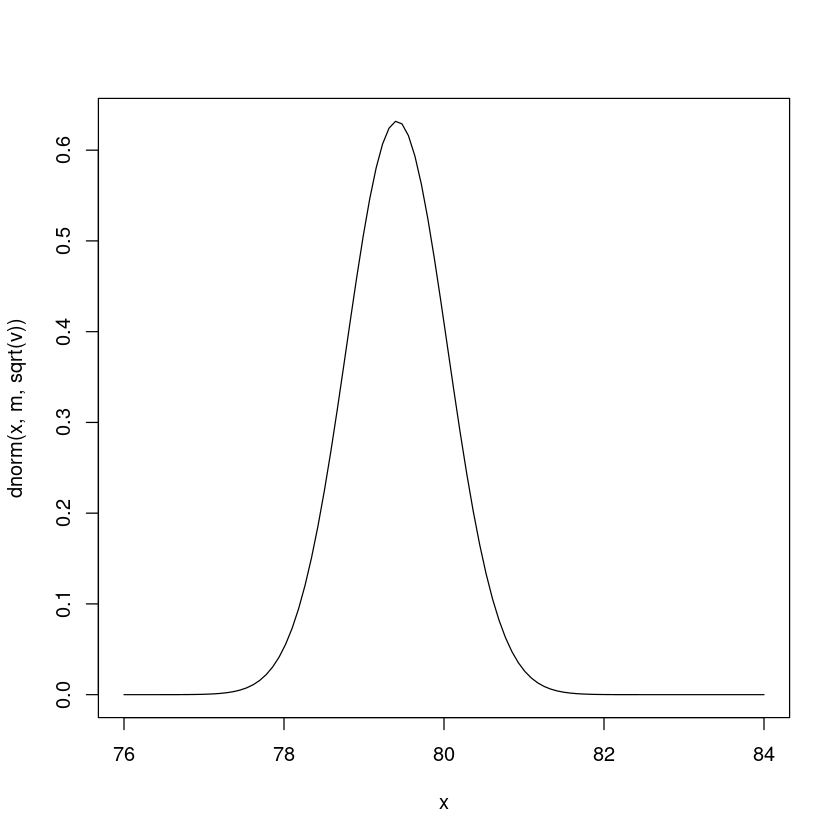

In [30]:
x <- seq(76, 84, length=100)
plot(x, dnorm(x, m, sqrt(v)), type="l")

In [27]:
round(qnorm(.025, m, sqrt(v)))
round(qnorm(.975, m, sqrt(v)))

[1] 78

[1] 81